# C++ Introduction - Pointers and Arrays

In [1]:
#include <iostream>
#include <iomanip>
using namespace std;

## Location
Digital storage (e.g. RAM or hard disk, etc.) is just a long series of bytes. A program can store information (bytes) somewhere in that larger sequence, but it needs to know where it put stuff so it can use it later. 

A *variable* is essentially an alias for a place in memory. The value of a variable is the value stored in the part of memory the variable represents. 

```
int foo = 7;
char bar = 'C';
int baz = 8;
int* fooP = &foo;
```


|         |   |   |   |   |   |
|---------|---|---|---|---|---|
|**Address**|0xA|0xB|0xC|0xD|0xE|
|**Value**  |7  |'C'| 8 |0xA|   |


The `&` operator can get us the *address* of the bytes represented by a variable.

The `*` operator can get us the bytes stored at a specific address.

A memory address is data, just like any other value. I can choose to make a variable whose value is a memory address.

A variable whose value is a memory address is called a **pointer**. 

In [14]:
int foo = 66;
int bar = 8;

int* fooPtr = &foo;
int* barPtr = &bar;

In [16]:
printf("Value of foo:          %d\n", foo );
printf("Location of foo:       %p\n", &foo );
printf("Value of fooPtr:       %p\n", fooPtr );
printf("Value fooPtr points to %d\n", *fooPtr);

Value of foo:          66
Location of foo:       0xffffaeae0050
Value of fooPtr:       0xffffaeae0050
Value fooPtr points to 66


In [7]:
printf("Value stored where fooPtr points (i.e. at %p): %d\n", fooPtr, *fooPtr);

Value stored where fooPtr points (i.e. at 0xffff84d7e028): 66


In [8]:
*&foo

66

In [9]:
printf("Location of foo:  %p\n", &foo );
printf("Location of foo:  %p\n", fooPtr );
printf("Location of bar:  %p\n", barPtr );

Location of foo:  0xffff84d7e028
Location of foo:  0xffff84d7e028
Location of bar:  0xffff84d7e02c


How many bytes away are the data for `foo` and `bar`?

In [10]:
long int longfoo = 7;
long int longbar = 8;
printf("Location of longfoo:  %p\n", &longfoo );
printf("Location of longbar:  %p\n", &longbar );

Location of longfoo:  0xffff84d7e068
Location of longbar:  0xffff84d7e070


How many bytes away are the data for `longfoo` and `longbar`?

Pointers are bytes, just like any other data. We can reinterpret and manipulate those bytes, just like any other data.

Note: the operations performed on pointers takes the type of pointer into account. So `<int*> + 1` behaves a differently than `<char*> + 1` (but in a good, convenient way).

In [11]:
printf("Location of foo:  %p\n", fooPtr );
printf("Location of bar:  %p\n", barPtr );

Location of foo:  0xffff84d7e028
Location of bar:  0xffff84d7e02c


In [12]:
barPtr - fooPtr // i.e. 1 "int" away

1

In [13]:
(char*)barPtr - (char*)fooPtr // i.e. 4 "chars" or bytes away

4

In [14]:
printf("&foo:     %p\n", &foo);
printf("&bar:     %p\n", &bar);
printf("&bar - 1: %p\n", &bar - 1);

&foo:     0xffff84d7e028
&bar:     0xffff84d7e02c
&bar - 1: 0xffff84d7e028


In [15]:
printf("*&foo:       %d\n", *&foo);
printf("*&bar:       %d\n", *&bar);
printf("*(&bar - 1): %d\n", *(&bar - 1));

*&foo:       66
*&bar:       8
*(&bar - 1): 66


If you create a variable, then the data for that variable must exist somewhere and there is an address `&` to that somewhere.

**You use `&` on variables to find out where the value for that variable is stored.**

In [16]:
printf("Location of fooPtr: %p\n", &fooPtr);

Location of fooPtr: 0xffff84d7e030


### References
In the statement
```c++
int a = 7;
```
the symbol `a` indicates a certain place in memory, and that certain place currently contains the bytes for `7`. 

The statement
```c++
a = 9;
```
then indicates that the place in memory that `a` represents should now have a new value: `9`.

The statement
```c++
int &b = a;
```
indicates that `b` now represents the place in memory that `a` represents. So any modifications to the value of `b`—i.e. the bits stored in the place in memory that `b` represents—will also be reflected in `a`. 

In essence, variables give names to memory locations. A **reference** is a name for a place in memory. We can have many names for the same memory location.

In [17]:
int a = 7;
int &b = a;
a = 8;
b

8

In [18]:
b = 19;
a

19

In [19]:
printf("%p, %p\n", &a, &b);

0xffff84d7e078, 0xffff84d7e078


## `new` and `delete`

There are two types of memory where variables are stored in C++: the **stack** and the **heap**. We'll learn more about these later in the course.

For now, understand that anything stored in the *stack* will be deleted when the current function exits. Anything stored in the *heap* will be available even after the current function exits.

Memory used in the *stack* is automatically recovered when the function returns. It can get reused later by other parts of the program.

Memory used in the *heap* is not automatically recovered (ever). If you don't free that memory manually, the program will hang on to it forever (i.e. until the program exits), even if you don't need the values stored in that memory anymore.

When you fail to release memory you no longer need, we call it a *memory leak*. `valgrind` is a tool that can help you identify memory leaks. 

Values declared with `new` will be created on the *heap*. All others are created on the *stack*. To delete a memory reservation, and thus free up the memory used to store that value, use `delete`.

`new` returns a pointer to the memory just reserved for your value. `delete` takes a pointer indicating the location in memory you want to free.

In [20]:
int *foo = new int(7);
printf("foo address: %p\n", foo);
printf("foo value:   %d\n", *foo);

delete foo;
printf("\ndelete foo;\n");
printf("foo address: %p\n", foo);
printf("foo value:   %d\n", *foo);

int *bar = new int(8);
printf("\nint *bar = new int(8);\n");
printf("bar address: %p\n", bar);
printf("bar value:   %d\n", *bar);
printf("foo address: %p\n", foo);
printf("foo value:   %d\n", *foo);



foo address: 0xaaaacf3d1f60
foo value:   7

delete foo;
foo address: 0xaaaacf3d1f60
foo value:   -820622624

int *bar = new int(8);
bar address: 0xaaaacf3d1f60
bar value:   8
foo address: 0xaaaacf3d1f60
foo value:   8


15

Once `foo` is deleted, `foo` still points to the same place in memory, but the value of `*foo` is no longer the same because that memory has been freed and no longer stores the value it started with.

In [1]:
// Note how the addresses for the stack and heap are VERY different
void foostuff() {
    int bar = 8;
    int* foo = new int(88);
    printf("&bar: %p\n", &bar);
    printf("foo:  %p\n", foo);
}

foostuff();

&bar: 0xffffce0af85c
foo:  0xaaab10618590


## Arrays

In [22]:
int fooArr[] = {1, 2, 3, 4}

In [23]:
fooArr[0]

1

In [24]:
fooArr[3]

4

In [25]:
*(fooArr+2)

3

So...what is `fooArr`?

A pointer!

When C++ makes an array, it returns the address of the first element of the array.

An array is an abstraction over pointers. An array is a pointer, but it has more meaning than a just a pointer: it communicates that there are additional values of the same type in adjacent memory, while a plain-old-pointer makes no claims about its neighbors.

But the syntax that applies to pointers applies to arrays, and vice-versa.

In [26]:
int foo = 7;
int bar = 42;
int baz = 79;
int* fooPtr = &foo;

printf("location of foo:  %p\n", &foo);
printf("location of bar:  %p\n", &bar);
printf("location of baz:  %p\n", &baz);

location of foo:  0xffff84d7e0b0
location of bar:  0xffff84d7e0b4
location of baz:  0xffff84d7e0b8


In [27]:
printf("value of fooPtr[0]: %d\n", fooPtr[0]);
printf("value of fooPtr[1]: %d\n", fooPtr[1]);
printf("value of fooPtr[2]: %d\n", fooPtr[2]);
printf("value of fooPtr[3]: %d\n", fooPtr[3]);
printf("value of fooPtr[4]: %d\n", fooPtr[4]);

value of fooPtr[0]: 7
value of fooPtr[1]: 42
value of fooPtr[2]: 79
value of fooPtr[3]: 0
value of fooPtr[4]: -2066227024


<div class="big centered">🤪</div>

### If I come up with a memory address, can I get the value?

In [28]:
int foo = 7;

In [29]:
printf("%p\n", &foo);

0xffff84d7e0e0


In [31]:
*(int*)0xffff84d7e0e0

7

Yes!

But you would probably never do this...

### `new` and `delete` with arrays
To create an array on the heap, use:
```c++
int size = 10;
int* numbers = new int[size];
```

To free the memory of an array on the heap, use:
```c++
delete[] numbers;
```









In [44]:
int size = 10;
int* numbers = new int[size];
int more_numbers[10];

In [45]:
numbers[0]

-788749184

In [46]:
more_numbers[0]

0

<div class='alert alert-info'>Just because you have created an array, it doesn't mean the slots have meaningful values.</div>

#### How does `delete[]` know how much memory to free?

https://www.youtube.com/embed/Lfg0--GbjVI?end=24

https://stackoverflow.com/questions/197675/how-does-delete-know-the-size-of-the-operand-array

## Variables in Memory Reference Guide

This guide attempts to demostrate in a more concrete way what is happening under the hood.

**The key ideas here are**:
- What gets stored in memory are just bytes. The interpretation of those bytes depends on the variable type.
  - Note how `foo` and `bar` have the same bytes.
- Pointers are variables that store memory addresses.
  - Note how the bytes stored for `fooPtr` match the memory address of `foo`. 
- References (i.e. `int &moreFoo = foo;`) just add another symbol for an already-active slot in memory.
  

```c++
int foo = 74;    // i.e. 0x4a
char bar = 'J';  // i.e. 0x4a
char baz = 'K';  // i.e. 0x4b
int* fooPtr = &foo;
int &moreFoo = foo;
```

|address         | bytes | symbols | symbol type | value |
|----------------|-------|---------|-------------|-------|
| 0xffffa57d93b8 | 4A    | `foo`,`moreFoo`| `int`| 74    |
| 0xffffa57d93b9 | 00    | ...     | ...         | ...   |
| 0xffffa57d93ba | 00    | ...     | ...         | ...   |
| 0xffffa57d93bb | 00    | ...     | ...         | ...   |
| 0xffffa57d93bc | 4A    | `bar`   | `char`      | `'J'` |
| 0xffffa57d93bd | 4B    | `baz`   | `char`      | `'K'` |
| 0xffffa57d93be | 00    |         |             |       |
| 0xffffa57d93bf | 00    |         |             |       |
| 0xffffa57d93c0 | B8    |`fooPtr` | `int*`      | `0xffffa57d93b8` |
| 0xffffa57d93c1 | 93    | ...     | ...         | ...   |
| 0xffffa57d93c2 | 7D    | ...     | ...         | ...   |
| 0xffffa57d93c3 | A5    | ...     | ...         | ...   |
| 0xffffa57d93c4 | FF    | ...     | ...         | ...   |
| 0xffffa57d93c5 | FF    | ...     | ...         | ...   |
| 0xffffa57d93c6 | 00    |         |             |       |
| 0xffffa57d93c7 | 00    |         |             |       |

- `foo` has value `74`, represented by bytes `4A`. It is stored in `0xffffa57d93b8`-`0xffffa57d93bb` (4-byte integer)
- `bar` has value `'J'`, represented by bytes `4A`. It is stored in `0xffffa57d93bc` (1-byte char)
- `baz` has value `'K'`, represented by bytes `4B`. It is stored in `0xffffa57d93bd` (1-byte char)
- Slots `0xffffa57d93be` and `0xffffa57d93bf` are unused
- `fooPtr` has value `0xffffa57d93b8` (i.e. the address of `foo`) and is stored in `0xffffa57d93c0`-`0xffffa57d93c5` (my compiler uses 6 bytes for a pointer)
- `moreFoo` is another reference for `0xffffa57d93b8` (i.e. the same place `foo` references)
- Note that the order of the bytes for multi-byte values is stored in an interesting way. 
  - When humans write a number, we start with the larger digits first (e.g. "1,342" starts with the thousands, then hundreds, tens, and ones). 
  - When a computer stores a number, it starts with the lower bytes first (ones, 16's, 256's, etc.). 
  - You see this in how the address for `foo` is stored as the value for `fooPtr`. 

The following code generates the primary content of the table above.

In [ ]:
int foo = 74;
char bar = 'J';
char baz = 'K';
int* fooPtr = &foo;
int &moreFoo = foo;

In [ ]:
printf("&foo:     %p\n", &foo);
printf("&bar:     %p\n", &bar);
printf("&baz:     %p\n", &baz);
printf("&quux:    %p\n", &quux);
printf("&fooPtr:  %p\n", &fooPtr);
printf("&moreFoo: %p\n", &moreFoo);
printf("\n");

for (int i = 0; i<16; i++) {
    // printf("%p: %#04hhx\n", ((char*)&foo)+i, *((((char*)&foo)+i)) );
    printf("| %p | %02X |\n", ((char*)&foo)+i, *((((char*)&foo)+i)) );
}

## `nullptr`

When you have a pointer, but nothing to point at, set its value to `nullptr`.

In [2]:
int* fooPtr = nullptr;

In older code, you'll see something like:

```c++
int* fooPtr = NULL;
```

That is old syntax. Use `nullptr` instead.

If you have just deleted data from the heap, if you don't immediately assign the pointer to something else, set it to `nullptr`.

In [3]:
int* foo = new int(7);
delete foo;
foo = nullptr;

## Pointers and Functions

Pointers are data and can be passed to functions like any other data.

You can pass by value (i.e. copy the address), or pass by reference (i.e. give the function it's own alias to the pointer). 

In [2]:
void printArray(int* array, int size) {
    for (int i = 0; i < size; i++) {
        cout << setw(11) << array[i];
    }
    cout << endl;
}

In [3]:
void putInSeven(int* array, int pos) {
    array[pos] = 7;
}

In [4]:
int size = 10;
int* array = new int[size];
printArray(array, size);

for (int i = 0; i < size; i++) {
    array[i] = 0;
}
printArray(array, size);

putInSeven(array, 1);
printArray(array, size);

 -823485408      43690          0          0          0          0  841901092      43520         48          0
          0          0          0          0          0          0          0          0          0          0
          0          7          0          0          0          0          0          0          0          0


In [5]:
int* arrayOfZeros(int size) {
    int* array = new int[size];
    for (int i = 0; i < size; i++) {
        array[i] = 0;
    }
    return array;
}

In [10]:
void newArray(int* &array, int size) {
    int* tmp = array;
    array = arrayOfZeros(size);
    delete tmp;
}

In [11]:
int* array2 = arrayOfZeros(size);
array2[0] = 42;
array2[1] = 35;
printArray(array2, size);

newArray(array2, size);
printArray(array2, size);

         42         35          0          0          0          0          0          0          0          0
          0          0          0          0          0          0          0          0          0          0


When you pass something by reference, the function can change that thing. 

When you pass a pointer by reference, the function can change what the pointer is pointing to.

In [12]:
void canTouchThis(const int* array) {
    array[0] = 7;
}

input_line_19:2:14: error: read-only variable is not assignable
    array[0] = 7;
    ~~~~~~~~ ^


Interpreter Error: 

A `const` array is an array that can't be modified. 

## Program Memory
[](attachment:image.png)
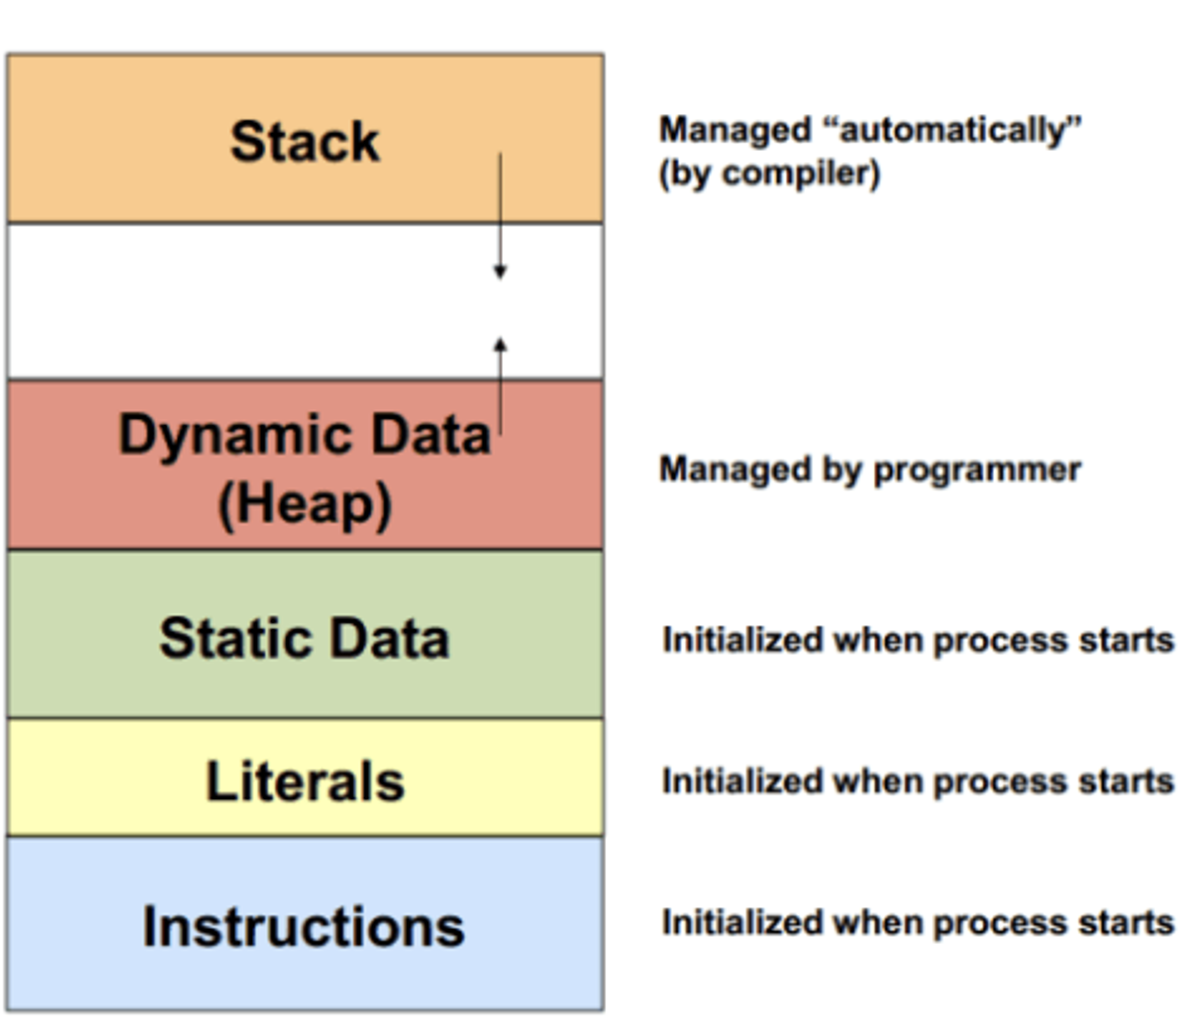

## Storing Things

In Python, we can use `list` to store data sequentially.

C++ doesn't have lists*, it has arrays.

In Python, you make a list and append stuff to the end of it.

In C++, you make an array, then stick stuff in it.


</br>  
</br>  
   
*_That's not completely (ok, even remotely) true, but for now just roll with it._

In [107]:
unsigned int size = 10;
int* numbers = new int[size];
unsigned int howMany = 0;

In [108]:
bool addItemToArray(int* const& numbers, unsigned int const& size, unsigned int & howMany, int const& value) {
    if (howMany < size) {
        numbers[howMany] = value;
        howMany++;
        return true;
    } else {
        return false;
    }
}

In [118]:
if (addItemToArray(numbers, size, howMany, 2)) {
    cout << "added" << endl;
} else {
    cerr << "full!" << endl;
}
printArray(numbers, size);

added
          2          2          2          2          2          2          2          2          2          2


In [95]:
unsigned int size = 10;
int* numbers = new int[size];
unsigned int howMany = 0;

In [106]:
if (addItemToArray(numbers, size, howMany, 2)) {
    cout << "added" << endl;
} else {
    cerr << "full!" << endl;
}
printArray(numbers, howMany);

full!


          2          2          2          2          2          2          2          2          2          2


Adding things to an array works fine until you run out of room. 

So how do you not run out of room?

Welcome to CS 235: Data Structures and Algorithms!

No really, how do you not run out of room?

## Grow

In [119]:
void grow(int* & array, unsigned int & capacity) {
    int* tmp = array;
    array = new int[capacity * 2];
    for (int i = 0; i < capacity; i++) {
        array[i] = tmp[i];
    }
    capacity *= 2;
    delete[] tmp;
}

In [172]:
unsigned int size = 2;
int* numbers = new int[size];
unsigned int howMany = 0;

In [209]:
if (addItemToArray(numbers, size, howMany, 7)) {
    cout << "added" << endl;
} else {
    cout << "need more room to grow!" << endl;
    grow(numbers, size);
    addItemToArray(numbers, size, howMany, 7);
}
printArray(numbers, size);

added
          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7          7         -1         -1         -1         -1 -818839888      43690         -1         -1         -1         -1         -1         -1 -818832560      43690         -1         -1         -1         -1         -1         -1 -818840016      43690         -1         -1         -1         -1         -1         -1


Isn't it a little awkward to have all these values and arrays floating around? Can't we wrap this in a class or something?


<div class='centered big'>🤔</div>

## Key Ideas

- Pointers
- Arrays
- Storing things